In [3]:
from scipy import stats
import pandas
from time import time
from math import exp
from astropy.table import Table

# TODO import exp

In [4]:
# reads the data into DataFrames
data = Table.read('G3CFoFGroup.fits', format='fits')
groupsDF = data.to_pandas()
data = Table.read('G3CGal.fits', format='fits')
galaxyDF = data.to_pandas()

In [5]:
#deletes all the unsorted galaxies
def deleteUnsortedGalaxies(groupsDF, galaxyDF):
    # Get indexes where name column has value john
    indexNames = groupsDF[groupsDF.GroupID == 0].index

    # Delete these row indexes from dataFrame
    groupsDF.drop(indexNames, inplace=True)


    # Get indexes where name column has value john
    indexNames = galaxyDF[galaxyDF.GroupID == 0].index

    # Delete these row indexes from dataFrame
    galaxyDF.drop(indexNames, inplace=True)
    return groupsDF, galaxyDF
groupsDF, galaxyDF = deleteUnsortedGalaxies(groupsDF, galaxyDF)

In [6]:
# sorts both dataFrames by GroupID in ascending order
galaxyDF.sort_values(by='GroupID')
groupsDF.sort_values(by='GroupID')

,GroupID,Nfof,IterCenCATAID,IterCenRA,IterCenDec,IterCenZ,Zfof,Rad50,Rad1Sig,Rad100,...,LumBfunc,d3vol,d3area,d2radec,d2raz,d2decz,distortcirc,distortellip,distortsph,URL_IMG
0,300001,148,250251,214.398045,2.053222,0.056313,0.055022,0.436319,0.624744,1.131663,...,1.029181e+12,35.436111,108.715706,2.406971,36.742413,35.594887,1.058002,1.191052,2.083743,b'http://www.gama-survey.org/data/files/GroupF...
1,300002,316,568002,213.784966,-0.493237,0.139901,0.140156,1.276074,1.584184,2.930472,...,3.133711e+12,99.053665,198.347031,5.934290,63.402206,62.033264,1.065398,1.160225,1.915849,b'http://www.gama-survey.org/data/files/GroupF...
2,300003,90,64581,219.432656,-0.316038,0.138807,0.138858,0.538908,0.667844,1.099516,...,8.415411e+11,22.891390,83.629608,1.698283,24.698238,26.691051,1.062520,1.099544,2.145003,b'http://www.gama-survey.org/data/files/GroupF...
3,300004,48,460770,213.808282,-1.617705,0.150573,0.150152,0.482766,0.641197,1.016419,...,3.976385e+11,11.802188,58.588242,1.126050,18.765947,18.442274,1.092708,1.258266,2.337140,b'http://www.gama-survey.org/data/files/GroupF...
4,300005,39,228013,215.696889,1.229897,0.118174,0.118443,0.438965,0.540218,0.855437,...,3.633638e+11,4.750470,29.195269,0.776283,8.646019,8.299245,1.111570,1.181856,2.136341,b'http://www.gama-survey.org/data/files/GroupF...
5,300006,43,239656,218.537628,1.616939,0.138738,0.137748,0.526315,0.637982,1.087865,...,5.025470e+11,9.561316,48.884693,0.934992,18.210564,12.351342,1.080422,1.140956,2.243935,b'http://www.gama-survey.org/data/files/GroupF...
6,300007,31,15899,217.189648,0.708124,0.103518,0.102978,0.345440,0.472448,0.732245,...,2.216021e+11,5.372994,35.943916,0.682676,9.850085,12.330122,1.118943,1.274848,2.422871,b'http://www.gama-survey.org/data/files/GroupF...
7,300008,35,238664,215.044960,1.617510,0.193106,0.192306,0.323479,0.555448,1.295839,...,4.501894e+11,5.860003,36.111401,0.713673,13.976723,10.447818,1.210211,1.310482,2.297356,b'http://www.gama-survey.org/data/files/GroupF...
8,300009,32,592727,213.883689,-0.049413,0.186438,0.185622,0.505578,0.590963,0.817429,...,3.858991e+11,7.378994,43.244884,0.760617,16.181551,11.473820,1.089297,1.211473,2.359314,b'http://www.gama-survey.org/data/files/GroupF...
9,300010,31,79327,221.037764,0.178485,0.297431,0.297011,0.747508,0.817151,1.020647,...,7.698651e+11,12.581567,68.456047,0.999787,20.858877,23.073589,1.132540,1.311553,2.616804,b'http://www.gama-survey.org/data/files/GroupF...


In [7]:
# speed of light for later calculations
c = 299792458 #m/s

In [8]:
# shows all the column names
pandas.options.display.max_columns = None

In [9]:
galaxyDF

,CATAID,RA,Dec,Z,Rpetro,DM_100_25_75,SURVEY_CODE,SigErr,GroupID,RankIterCen,SepIterCen,CoSepIterCen,AngSepIterCen,RankBCG,SepBCG,CoSepBCG,AngSepBCG,RankCen,SepCen,CoSepCen,AngSepCen
18,14482,211.775111,0.820451,0.130674,17.091314,38.175995,1,10.761519,302970,1,0.000000,0.000000,0.000000,1,0.000000,0.000000,0.000000,1,9.940932,0.018416,0.016286
20,14486,211.824238,0.771109,0.200574,17.897711,39.204990,5,24.872768,302971,1,0.000000,0.000000,0.000000,1,0.000000,0.000000,0.000000,1,10.317329,0.028984,0.024128
21,14487,211.830970,0.775530,0.201935,18.557320,39.221508,5,24.091707,302971,2,28.989700,0.081440,0.067795,2,28.989700,0.081440,0.067795,2,18.672369,0.052456,0.043667
22,14488,211.834992,0.824399,0.240739,17.288418,39.654072,1,14.402241,301442,1,0.004347,0.000014,0.000012,1,0.004347,0.000014,0.000012,1,37.253567,0.123782,0.099822
23,14489,211.851007,0.827919,0.240239,17.925884,39.648911,1,13.911663,301442,2,59.025433,0.196124,0.158161,2,59.025433,0.196124,0.158161,2,43.426163,0.144292,0.116362
24,14490,211.853413,0.777579,0.239138,19.491764,39.637527,5,42.441864,301442,3,181.124481,0.601822,0.485329,3,181.124481,0.601822,0.485329,3,151.540726,0.503524,0.406059
29,14495,211.810623,0.778495,0.357743,19.713562,40.653461,5,41.786972,302972,2,88.562035,0.427650,0.314890,2,88.562035,0.427650,0.314890,2,47.372730,0.228754,0.168438
30,14496,211.718447,0.775170,0.048332,19.567255,35.887745,5,33.472733,300206,7,270.049988,0.189750,0.180921,7,270.049988,0.189750,0.180921,8,272.588287,0.191533,0.182622
32,14498,211.805926,0.814115,0.130873,19.636492,38.179604,5,25.917471,302970,2,113.244370,0.209786,0.185524,2,113.244370,0.209786,0.185524,2,103.303436,0.191370,0.169238
33,14499,211.822058,0.800277,0.358443,19.566545,40.658485,5,65.512665,302972,1,0.004347,0.000021,0.000015,1,0.004347,0.000021,0.000015,1,41.189308,0.198895,0.146452


In [10]:
groupsDF

,GroupID,Nfof,IterCenCATAID,IterCenRA,IterCenDec,IterCenZ,Zfof,Rad50,Rad1Sig,Rad100,RelDen,Zcomp,GroupEdge,VelDisp,VelDispRaw,VelErr,TotRmag,TotFluxProxy,MassProxy,BCGCATAID,BCGRA,BCGDec,Rgap,CenRA,CenDec,RadKurt,AxAng,AxRat,SymKS,VelSkew,VelKurt,Modality,LinkTot,LinkStrenProj,LinkStrenRad,LinkStrenComb,MassA,MassAfunc,LumB,LumBfunc,d3vol,d3area,d2radec,d2raz,d2decz,distortcirc,distortellip,distortsph,URL_IMG
0,300001,148,250251,214.398045,2.053222,0.056313,0.055022,0.436319,0.624744,1.131663,10.569494,0.995139,1.0,593.028015,594.077942,35.303200,-24.846533,6.599651e+11,3.567524e+13,250251,214.398045,2.053222,1.430983,214.394684,2.068115,-0.956333,57.875015,0.833195,9.261557e-02,0.474728,-0.263826,0.399194,940,0.423765,0.542496,0.237676,3.567524e+14,3.565297e+14,6.863637e+11,1.029181e+12,35.436111,108.715706,2.406971,36.742413,35.594887,1.058002,1.191052,2.083743,b'http://www.gama-survey.org/data/files/GroupF...
1,300002,316,568002,213.784966,-0.493237,0.139901,0.140156,1.276074,1.584184,2.930472,47.883335,0.992535,1.0,718.269836,719.316467,38.790428,-26.355112,3.110763e+12,1.530606e+14,568002,213.784966,-0.493237,0.392413,213.684258,-0.392408,-1.154807,117.639473,0.608470,9.476206e-07,0.761458,0.499249,0.486210,2330,0.397375,0.554114,0.221314,1.530606e+15,1.084701e+15,3.235194e+12,3.133711e+12,99.053665,198.347031,5.934290,63.402206,62.033264,1.065398,1.160225,1.915849,b'http://www.gama-survey.org/data/files/GroupF...
2,300003,90,64581,219.432656,-0.316038,0.138807,0.138858,0.538908,0.667844,1.099516,15.769166,1.000000,1.0,685.390564,686.712830,42.593498,-24.945448,8.468327e+11,5.885771e+13,64581,219.432656,-0.316038,0.381575,219.419509,-0.305589,-1.343621,17.638464,0.791183,3.660564e-02,-0.262037,-0.554190,0.323139,478,0.366732,0.524027,0.195825,5.885772e+14,4.699668e+14,8.807060e+11,8.415411e+11,22.891390,83.629608,1.698283,24.698238,26.691051,1.062520,1.099544,2.145003,b'http://www.gama-survey.org/data/files/GroupF...
3,300004,48,460770,213.808282,-1.617705,0.150573,0.150152,0.482766,0.641197,1.016419,9.330249,1.000000,1.0,652.923340,654.288513,42.244732,-24.161560,4.215921e+11,4.784909e+13,460770,213.808282,-1.617705,1.511295,213.827334,-1.632859,-1.036974,38.731483,0.684972,1.197568e-01,-0.045078,-0.445783,0.313260,172,0.475734,0.605615,0.284103,4.784909e+14,4.078159e+14,4.384558e+11,3.976385e+11,11.802188,58.588242,1.126050,18.765947,18.442274,1.092708,1.258266,2.337140,b'http://www.gama-survey.org/data/files/GroupF...
4,300005,39,228013,215.696889,1.229897,0.118174,0.118443,0.438965,0.540218,0.855437,5.704734,0.995483,1.0,356.940613,358.950012,37.927876,-24.014267,3.453926e+11,1.300272e+13,228013,215.696889,1.229897,1.191434,215.686542,1.245754,-1.093832,51.286716,0.968581,3.865249e-01,0.849213,0.900808,0.451576,202,0.416965,0.645070,0.284405,1.300272e+14,1.209776e+14,3.592083e+11,3.633638e+11,4.750470,29.195269,0.776283,8.646019,8.299245,1.111570,1.181856,2.136341,b'http://www.gama-survey.org/data/files/GroupF...
5,300006,43,239656,218.537628,1.616939,0.138738,0.137748,0.526315,0.637982,1.087865,7.456249,0.996439,1.0,510.835846,512.020447,34.809177,-24.403091,5.126483e+11,3.193164e+13,239656,218.537628,1.616939,0.551493,218.575668,1.607378,-1.225014,72.044205,0.719162,6.741968e-01,0.095353,-0.492813,0.311173,194,0.373967,0.570559,0.230931,3.193164e+14,2.823829e+14,5.331543e+11,5.025470e+11,9.561316,48.884693,0.934992,18.210564,12.351342,1.080422,1.140956,2.243935,b'http://www.gama-survey.org/data/files/GroupF...
6,300007,31,15899,217.189648,0.708124,0.103518,0.102978,0.345440,0.472448,0.732245,3.943019,0.997655,1.0,509.335815,511.195831,43.568291,-23.440269,1.980067e+11,2.083499e+13,15899,217.189648,0.708124,2.498183,217.186934,0.709875,-0.988346,50.316479,0.909845,9.297612e-01,-0.494309,-0.049676,0.414439,112,0.464771,0.604427,0.291108,2.083499e+14,2.078377e+14,2.059270e+11,2.216021e+11,5.372994,35.943916,0.682676,9.850085,12.330122,1.118943,1.274848,2.422871,b'http://www.gama-survey.org/data/files/GroupF...
7,300008

In [11]:
print("groupsDF.columns:\n", groupsDF.columns)
print()
print("galaxyDF.columns:\n", galaxyDF.columns)

groupsDF.columns:
 Index(['GroupID', 'Nfof', 'IterCenCATAID', 'IterCenRA', 'IterCenDec',
       'IterCenZ', 'Zfof', 'Rad50', 'Rad1Sig', 'Rad100', 'RelDen', 'Zcomp',
       'GroupEdge', 'VelDisp', 'VelDispRaw', 'VelErr', 'TotRmag',
       'TotFluxProxy', 'MassProxy', 'BCGCATAID', 'BCGRA', 'BCGDec', 'Rgap',
       'CenRA', 'CenDec', 'RadKurt', 'AxAng', 'AxRat', 'SymKS', 'VelSkew',
       'VelKurt', 'Modality', 'LinkTot', 'LinkStrenProj', 'LinkStrenRad',
       'LinkStrenComb', 'MassA', 'MassAfunc', 'LumB', 'LumBfunc', 'd3vol',
       'd3area', 'd2radec', 'd2raz', 'd2decz', 'distortcirc', 'distortellip',
       'distortsph', 'URL_IMG'],
      dtype='object')

galaxyDF.columns:
 Index(['CATAID', 'RA', 'Dec', 'Z', 'Rpetro', 'DM_100_25_75', 'SURVEY_CODE',
       'SigErr', 'GroupID', 'RankIterCen', 'SepIterCen', 'CoSepIterCen',
       'AngSepIterCen', 'RankBCG', 'SepBCG', 'CoSepBCG', 'AngSepBCG',
       'RankCen', 'SepCen', 'CoSepCen', 'AngSepCen'],
      dtype='object')


In [12]:
def getADstar(andersonScore, n):
    ADstar = andersonScore*(1 + 0.75/n + 2.25/(n**2))
    return ADstar

def getpvalue(andersonScore, ADstar,n):
    AD = andersonScore
    p = None
    
    if n < 30:
        AD == ADstar 
        
    if AD >= 0.60:
        p = exp(1.2937 - 5.709*(AD)+ 0.0186*(AD)**2)
    if 0.34 < AD and  AD < 0.60:
        p = exp(0.9177 - 4.279*(AD) - 1.38*(AD)**2)
    if 0.20 < AD and AD < .34:
        p = 1 - exp(-8.318 + 42.796*(AD)- 59.938*(AD)**2)
    if AD <= 0.20:
        p = 1 - exp(-13.436 + 101.14*(AD)- 223.73*(AD)**2)
    return p


In [13]:
# walk through each group in galaxyDF
def getGalaxyStats(galaxyDF, groupsDF):
    galaxiesStatsList = list()
    
    # for more generalization, one could do min(DF.index) and max(DF.index)+1 for the range
    # this would be good for use in an automated processing of data.
    for galaxyGroupIndex in range(300001, 402540+1):

        # makes a reference to a slice of the galaxyDF where the slice is all the galaxies with the current GroupID
        galaxyGroupGalaxiesDF = galaxyDF[galaxyDF.GroupID==galaxyGroupIndex]

        # storing data about the velocities of each galaxy in the current galaxy Group
        centeredVelocities = []
        Guassianess = []


        lengthGalaxyGroupGalaxiesDF = len(galaxyGroupGalaxiesDF.index)

        if lengthGalaxyGroupGalaxiesDF < 8:
            continue #skips the rest of the code in this loops

        # first finds the current group then pulls its Zfof value
        currentGroupZfof = groupsDF[groupsDF.GroupID==galaxyGroupIndex].iloc[0].at['Zfof']


        # loop calculates velocities into a list
        for index, galaxy in galaxyGroupGalaxiesDF.iterrows(): 
            galaxyZ = galaxy.Z
            centeredVelocity = (galaxyZ-currentGroupZfof)*c
            centeredVelocities.append(centeredVelocity)


        anderson = stats.anderson(centeredVelocities, dist='norm')
        andersonScore = anderson.statistic # TODO
        
                        
        difference = anderson.statistic - anderson.critical_values[2]
        Guassianess.append(difference)
        

        n = len(centeredVelocities)
        ADstar = getADstar(andersonScore, n)
        pvalue = getpvalue(andersonScore, ADstar, n)

        gaussian = False
        if anderson.critical_values[0] <= anderson.statistic: 
            gaussian = True
        
        #anderson.critical_values[2] - anderson.statistic 
        
        newRowDict = {"galaxyGroupIndex": galaxyGroupIndex, "anderson_statisic": anderson.statistic,"anderson_critical_values": [anderson.critical_values], "anderson_significance_levels": [anderson.significance_level], "Gaussian": gaussian, 
                  "ADstar": ADstar, "pvalue": pvalue, "sample size": n, "Guassianess": Guassianess, "velocity dispersion" : centeredVelocity}
        galaxiesStatsList.append(newRowDict)
       # galaxiesStatsList = getGalaxyStats(galaxyDF, groupsDF)
    return galaxiesStatsList
galaxiesStatsList = getGalaxyStats(galaxyDF, groupsDF)

In [14]:
def galazyStatsToDF(galaxiesStatsList):
    galaxyStatsDF = pandas.concat(

            [pandas.DataFrame.from_dict(galaxiesStatsList[i]) for i in range(len(galaxiesStatsList))],
        ignore_index=True
    )

    # galaxiesStats.filter(Gaussian==True)
    return galaxyStatsDF
galaxyStatsDF = galazyStatsToDF(galaxiesStatsList)
galaxyStatsDF



,galaxyGroupIndex,anderson_statisic,anderson_critical_values,anderson_significance_levels,Gaussian,ADstar,pvalue,sample size,Guassianess,velocity dispersion
0,300001,0.866708,"[0.561, 0.639, 0.767, 0.895, 1.064]","[15.0, 10.0, 5.0, 2.5, 1.0]",True,0.871189,2.624275e-02,148,0.099708,-5.209189e+05
1,300002,4.320025,"[0.569, 0.648, 0.777, 0.907, 1.079]","[15.0, 10.0, 5.0, 2.5, 1.0]",True,4.330376,1.003658e-10,316,3.543025,-5.494278e+04
2,300003,0.457030,"[0.553, 0.63, 0.756, 0.882, 1.049]","[15.0, 10.0, 5.0, 2.5, 1.0]",False,0.460966,2.654886e-01,90,-0.298970,5.574108e+05
3,300004,0.387540,"[0.537, 0.612, 0.734, 0.856, 1.018]","[15.0, 10.0, 5.0, 2.5, 1.0]",False,0.393974,3.875756e-01,48,-0.346460,1.712701e+05
4,300005,0.668307,"[0.53, 0.604, 0.725, 0.845, 1.005]","[15.0, 10.0, 5.0, 2.5, 1.0]",True,0.682148,8.099586e-02,39,-0.056693,-9.511681e+04
5,300006,0.219258,"[0.534, 0.608, 0.729, 0.85, 1.012]","[15.0, 10.0, 5.0, 2.5, 1.0]",False,0.223349,8.373420e-01,43,-0.509742,1.970060e+03
6,300007,0.264718,"[0.522, 0.595, 0.713, 0.832, 0.99]","[15.0, 10.0, 5.0, 2.5, 1.0]",False,0.271742,6.955732e-01,31,-0.448282,-1.950672e+05
7,300008,0.156820,"[0.527, 0.6, 0.719, 0.839, 0.998]","[15.0, 10.0, 5.0, 2.5, 1.0]",False,0.160468,9.539171e-01,35,-0.562180,6.147257e+05
8,300009,0.296205,"[0.523, 0.596, 0.715, 0.834, 0.992]","[15.0, 10.0, 5.0, 2.5, 1.0]",False,0.303798,5.935992e-01,32,-0.418795,1.408910e+06
9,300010,0.678669,"[0.522, 0.595, 0.713, 0.832, 0.99]","[15.0, 10.0, 5.0, 2.5, 1.0]",True,0.696678,7.636302e-02,31,-0.034331,9.424480e+05


In [15]:
## time analysis of iterating through all of the galaxy indecies -- 91 seconds

# tOne = time()
# for galaxyIndex in range(300001, 402540+1):
    
#     galaxyGroupGalaxiesDF = galaxyDF[galaxyDF.GroupID==galaxyIndex]
# timeElapsed = time() - tOne
# print("timeElapsed:", timeElapsed)



In [16]:
galaxyStatsDF['Guassianess'].max()
galaxyStatsDF['Guassianess'].idxmax()

1

In [17]:
galaxyStatsDF.iloc[1]

galaxyGroupIndex                                             300002
anderson_statisic                                           4.32003
anderson_critical_values        [0.569, 0.648, 0.777, 0.907, 1.079]
anderson_significance_levels            [15.0, 10.0, 5.0, 2.5, 1.0]
Gaussian                                                       True
ADstar                                                      4.33038
pvalue                                                  1.00366e-10
sample size                                                     316
Guassianess                                                 3.54303
velocity dispersion                                        -54942.8
Name: 1, dtype: object

In [18]:
largest_group_DF = galaxyDF[galaxyDF.GroupID==300002]
list1= largest_group_DF.loc[:,'Z'].tolist()
#print(list1)
list1.sort() 
#print(list1)
print("Smallest element is:", *list1[:1]) 

# printing the last element 

print ("Largest element is : " +  str(list1[-1])) 


Smallest element is: 0.13415935635566711
Largest element is : 0.14812801778316498


In [19]:
from matplotlib import pyplot as plt 
import math 
import numpy as np 


#numBins = len(largest_group_redshifts)
numBins = 50
rng = (0., 0.06) #(x.min(), x.max())
plt.hist(list1, bins=numBins)
plt.xlabel('z value for ID = 300002')
plt.ylabel('frequency of occurance')
plt.title('Most Guassian')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [20]:
galaxyStatsDF['Guassianess'].min()

-0.6273713727903952

In [21]:
galaxyStatsDF['Guassianess'].idxmin()

363

In [22]:
galaxyStatsDF.iloc[363]

galaxyGroupIndex                                             400003
anderson_statisic                                          0.111629
anderson_critical_values        [0.541, 0.616, 0.739, 0.862, 1.025]
anderson_significance_levels            [15.0, 10.0, 5.0, 2.5, 1.0]
Gaussian                                                      False
ADstar                                                     0.113265
pvalue                                                     0.992801
sample size                                                      54
Guassianess                                               -0.627371
velocity dispersion                                          436423
Name: 363, dtype: object

In [23]:
smallest_group_DF = galaxyDF[galaxyDF.GroupID==400003]
list2= smallest_group_DF.loc[:,'Z'].tolist()

list2.sort()
#print(list2)
print("Smallest element is:", *list2[:1]) 

# printing the last element 

print ("Largest element is : " +  str(list2[-1])) 


Smallest element is: 0.049867089837789536
Largest element is : 0.05597304180264473


<function matplotlib.pyplot.show(*args, **kw)>

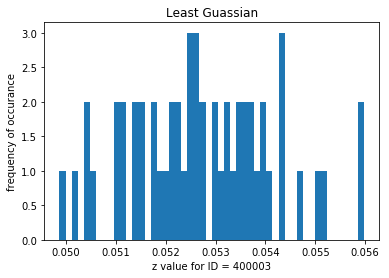

In [24]:

#numBins = len(largest_group_redshifts)
numBins = 50
rng = (0., 0.2) #(x.min(), x.max())
plt.hist(list2, bins=numBins)
plt.xlabel('z value for ID = 400003')
plt.ylabel('frequency of occurance')
plt.title('Least Guassian')
plt.show

In [25]:
#Check using the p value method 

# find largest p value 
galaxyStatsDF['pvalue'].max()

0.9944848849990777

In [26]:
# find where it is located 
galaxyStatsDF['pvalue'].idxmax() #output = 255 
galaxyStatsDF.iloc[255]

galaxyGroupIndex                                             300259
anderson_statisic                                          0.106536
anderson_critical_values        [0.497, 0.566, 0.679, 0.792, 0.942]
anderson_significance_levels            [15.0, 10.0, 5.0, 2.5, 1.0]
Gaussian                                                      False
ADstar                                                     0.114101
pvalue                                                     0.994485
sample size                                                      13
Guassianess                                               -0.572464
velocity dispersion                                        -77917.9
Name: 255, dtype: object

In [27]:
largest_p_value = galaxyDF[galaxyDF.GroupID==300259]
list3= largest_p_value.loc[:,'Z'].tolist()

list3.sort()
print(list3)
print("Smallest element is:", *list3[:1]) 

# printing the last element 

print ("Largest element is : " +  str(list3[-1])) 

[0.31256264448165894, 0.31399479508399963, 0.3148440718650818, 0.315114289522171, 0.3154154121875763, 0.3160059154033661, 0.3162658214569092, 0.31711623072624207, 0.3173466920852661, 0.3176461160182953, 0.31787630915641785, 0.31882724165916443, 0.3200775980949402]
Smallest element is: 0.31256264448165894
Largest element is : 0.3200775980949402


<function matplotlib.pyplot.show(*args, **kw)>

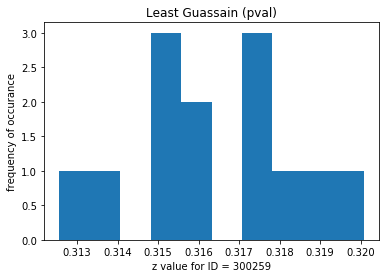

In [28]:
#numBins = len(largest_group_redshifts)
numBins = 10
rng = (0., 0.35) #(x.min(), x.max())
plt.hist(list3, bins=numBins)
plt.xlabel('z value for ID = 300259')
plt.ylabel('frequency of occurance')
plt.title('Least Guassain (pval)')
plt.show

In [29]:
galaxyStatsDF['pvalue'].min()
galaxyStatsDF['pvalue'].idxmin() # checks out with the ad test analysis 

1

In [30]:
galaxyStatsDF['Gaussian'].value_counts() 

#for 5 (P = 0.05) percent 434 NG and 51 are G 

# for 10 (P = 0.1) percent 401 NG and 84 are G 

# for 15 (p= 0.15) percent 375 NG and 110 are G  

False    375
True     110
Name: Gaussian, dtype: int64

In [ ]:
# fraction scatter plot 
#fraction of NG on y axis (# of NG systems divided by total number of systems in the bin)
# x value velocity despersion 

vel_dis = galaxyStatsDF.loc[:,'velocity dispersion'].tolist()
vel_dis.sort()
print(vel_dis)

#numBins = len(largest_group_redshifts)
numBins = 10
rng = (-100000,100000 ) #(x.min(), x.max())
plt.hist(vel_dis, bins=numBins)
plt.xlabel('z value for ID = 300259')
plt.ylabel('frequency of occurance')
plt.title('Least Guassain (pval)')
plt.show

# minimum value -3875880 
# maximum value 4013784
len(vel_dis)

# 485 total 

bin_edges = pandas.cut(vel_dis, 10, retbins=True)[1]  # array of bin edges
i = 0
while i < len(bin_edges)-1:
  # extract all galaxies with dis in this range
  extraction = galaxyStatsDF.loc[(galaxyStatsDF['velocity dispersion'] >= bin_edges[i]) & (galaxyStatsDF['velocity dispersion'] < bin_edges[i+1])]
  
  # count number of Trues and Falses for gaussianess
  rows_with_true = extraction.loc[extraction['Gaussian'] == True]

  if len(extraction) == 0: 
        continue 
  
  percentage = len(rows_with_true) / len(extraction)
  
  print(percentage)
  
  i+=1

# make into 48 intervals 

bins = pandas.cut(vel_dis, 10)


#The empty() function is used to create a new array of given shape and type, without initializing entries
grouped_vel_dis = np.empty(10)


#qcut if I want all of them to have the same number of entries inside it  
#bins = pandas.cut(vel_dis, 48)

# make a nested empty list 

grouped_vel_dis = []
for i in range(11):
    grouped_vel_dis.append([])

#print(grouped_vel_dis)

#initialize the 
bin_idx = 0
dis_idx = 0
#while dispersion index is less than 48 bins
while dis_idx < len(vel_dis):
    #velocity dispersion contains disperison index 
    dis = vel_dis[dis_idx]
    #print(dis)
    #print(bins[bin_idx])
    Range = bins[bin_idx].right - bins[bin_idx].left 
    if dis >= (bins[bin_idx].left - 0.05*Range) and dis <= (bins[bin_idx].right + 0.05*Range):
        
        #print(type(bins[bin_idx]))
        
        #grouped_vel_dis[bin_idx].append(dis)#gives error because empty(48) is a list of numbers 
        #grouped_vel_dis[bin_idx] = np.append(grouped_vel_dis[bin_idx], dis)
        print(bin_idx)
        grouped_vel_dis[bin_idx].append(dis)
        dis_idx += 1
        
    elif dis <= (bins[bin_idx].left + 0.05*Range):
        grouped_vel_dis[bin_idx].append(dis)
        dis_idx += 1
        
    else:
        #move onto next list 
       # grouped_vel_dis.append([])
        bin_idx+= 1 
        
        """if bin_idx > len(bins)-1:
            bin_idx -= 1 
            grouped_vel_dis[bin_idx].append(dis)
            dis_idx += 1 
            """
        
print(grouped_vel_dis)
#argest_p_value = galaxyStatsDF[galaxyStatsDF.('velocity dispersion')== -3875880.4263168573]


# get mean value of bin 

#creat 48 items y values 

#grp_idx = 0 
#gal_idx = 0 
#for grp_idx < 48:
 #   for gal_idx < len(grouped_vel_dis):
        


galaxyStatsDF.loc[galaxyStatsDF['velocity dispersion'] == grouped_vel_dis[0][0]]

# References below

# scipy.stats.anderson
scipy.stats.anderson(x, dist='norm')[source]
Anderson-Darling test for data coming from a particular distribution.

The Anderson-Darling test tests the null hypothesis that a sample is drawn from a population that follows a particular distribution. For the Anderson-Darling test, the critical values depend on which distribution is being tested against. This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.

Parameters
xarray_like
Array of sample data.

dist{‘norm’, ‘expon’, ‘logistic’, ‘gumbel’, ‘gumbel_l’, ‘gumbel_r’, ‘extreme1’}, optional
The type of distribution to test against. The default is ‘norm’. The names ‘extreme1’, ‘gumbel_l’ and ‘gumbel’ are synonyms for the same distribution.

Returns
statisticfloat
The Anderson-Darling test statistic.

critical_valueslist
The critical values for this distribution.

significance_levellist
The significance levels for the corresponding critical values in percents. The function returns critical values for a differing set of significance levels depending on the distribution that is being tested against.

See also
kstest
The Kolmogorov-Smirnov test for goodness-of-fit.

Notes

Critical values provided are for the following significance levels:

normal/exponenential
15%, 10%, 5%, 2.5%, 1%

logistic
25%, 10%, 5%, 2.5%, 1%, 0.5%

Gumbel
25%, 10%, 5%, 2.5%, 1%

If the returned statistic is larger than these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution can be rejected. The returned statistic is referred to as ‘A2’ in the references.

# scipy.stats.ttest_ind
scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')[source]
Calculate the T-test for the means of two independent samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

Parameters
a, barray_like
The arrays must have the same shape, except in the dimension corresponding to axis (the first, by default).

axisint or None, optional
Axis along which to compute test. If None, compute over the whole arrays, a, and b.

equal_varbool, optional
If True (default), perform a standard independent 2 sample test that assumes equal population variances [1]. If False, perform Welch’s t-test, which does not assume equal population variance [2].

New in version 0.11.0.

nan_policy{‘propagate’, ‘raise’, ‘omit’}, optional
Defines how to handle when input contains nan. The following options are available (default is ‘propagate’):

‘propagate’: returns nan

‘raise’: throws an error

‘omit’: performs the calculations ignoring nan values

Returns
statisticfloat or array
The calculated t-statistic.

pvaluefloat or array
The two-tailed p-value.

Notes

We can use this test, if we observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

References

# GroupFinding
# G3CFoFGroup
# v10
# 2017-07-11
# Aaron Robotham <aaron.robotham@uwa.edu.au>
#
# This is a catalogue of the galaxy group properties in the GAMA II
# G02 and G15 survey regions.
#
GroupID          1  -            meta.id;meta.main       Unique group ID, as listed in the associated G3CGal links
Nfof             2  -            -                       Group multiplicity
IterCenCATAID    3  -            meta.id                 Reference ID of the iterative central galaxy (preferred position of the group centre)
IterCenRA        4  deg          pos.eq.ra               RA of the iterative central galaxy (J2000)
IterCenDec       5  deg          pos.eq.dec              Dec of the iterative central galaxy (J2000)
IterCenZ         6  -            src.redshift            Redshift of the iterative central galaxy
Zfof             7  -            src.redshift            Median redshift of the group
Rad50            8  Mpc/h        phys.size.radius        Group radius defined by the 50th percentile group member, based on the projected distance away from IterCenID
Rad1Sig          9  Mpc/h        phys.size.radius        Group radius defined by the 68th percentile group member, based on the projected distance away from IterCenID
Rad100          10  Mpc/h        phys.size.radius        Group radius defined by the most distant group member, based on the projected distance away from IterCenID
RelDen          11  -            -                       Relative galaxy space density (w.r.t. prediction based on the random catalogues) within a cylinder of radius 1.5Mpc/h and offset 18Mpc/h (i.e. diameter 3.0Mpc/h and total length 36Mpc/h) centred on IterCenID
Zcomp           12  -            -                       Average redshift completeness of the group: for each group member the redshift completeness within a projected 1.5Mpc/h radius (at the position of the galaxy) is estimated and then averaged over all group members to provide ZComp
GroupEdge       13  -            -                       Fraction of the group within the survey volume, as estimated from IterCen and Rad100
VelDisp         14  km/s         phys.veloc              Group velocity dispersion, corrected for the total group velocity dispersion error (VelErr); set to zero if VelErr>VelDispRaw 
VelDispRaw      15  km/s         phys.veloc              Raw group velocity dispersion
VelErr          16  km/s         phys.veloc              Total group velocity error
TotRmag         17  mag-5log(h)  phys.magAbs             r-band absolute magnitude of the group, obtained by adding up the r-band luminosities of its members
TotFluxProxy    18  -            -                       Proxy for group total r-band luminosity down to M_r - 5 log_10 h = -14 in solar luminosities. It is based on the total observed r-band flux and the fraction of light (as estimated from the global galaxy LF) observable at the group redshift; value listed corresponds to B=1 in Eq. 22 of Robotham et al. (2011)
MassProxy       19  -            -                       Proxy for dynamical group mass estimated via M \propto Rad50 * VelDisp^2; value listed corresponds to A=1 in Eq. 18 of Robotham et al. (2011), i.e. calibrated mass is given by A*M, with A the scaling factor described in section 4.3 of Robotham et al. (2011)
BCGCATAID       20  -            meta.id                 GAMA ID of BCG
BCGRA           21  deg          pos.eq.ra               RA of BCG (J2000)
BCGDec          22  deg          pos.eq.dec              Dec of BCG (J2000)
Rgap            23  mag          phot.mag                Apparent r-band magnitude gap between BCG and second brightest group member
CenRA           24  deg          pos.eq.ra               RA of group for a r-band luminosity weighted CoM of the system (J2000)
CenDec          25  deg          pos.eq.dec              Dec of group for a r-band luminosity weighted CoM of the system (J2000)
RadKurt         26  -            -                       Unbiased kurtosis of the radial distribution of galaxies based on the projected distance to IterCen
AxAng           27  deg          pos.posAng              Angle of the group major axis on the sky (N -> E = 0 -> 90) using the Carter & Metcalfe (1980) algorithm (0<=AxAng<=180, requires 3 or more members, so -999 otherwise)
AxRat           28  -            phys.size.axisRatio     Axial ratio of the minor and major axes of the group using the Carter & Metcalfe (1980) algorithm (0<=AxRat<=1, requires 3 or more members, so -999 otherwise)
SymKS           29  -            -                       KS test of the uniformity of groups once corrected for the axial-ratio; an elliptical group has an average p-value of 0.5 (requires 3 or more members, so -999 otherwise)
VelSkew         30  -            -                       Unbiased skew of the galaxy velocities (requires 3 or more members, so -999 otherwise)
VelKurt         31  -            -                       Unbiased kurtosis of the galaxy velocities (requires 4 or more members, so -999 otherwise)
Modality        32  -            -                       Modality of the system: (1+VelSkew^2)/(3+VelKurt^2); this will be 1/3 for a normal distribution and 0.555 for a uniform one
LinkTot         33  -            -                       Total number of FoF links in the system
LinkStrenProj   34  -            -                       Link strength in projection, 1 minus the average projected FoF link relative to the separation allowed by the FoF algorithm (0<=LinkStrenProj<=1), i.e. larger values mean a stronger link
LinkStrenRad    35  -            -                       Link strength radially, 1 minus the average radial FoF link relative to the separation allowed by the FoF algorithm (0<=LinkStrenZ<=1), i.e. larger values mean a stronger link
LinkStrenComb   36  -            -                       Link strength combined, the average of LinkStrenProj*LinkStrenZ for all the links in the group (0<=LinkStrenComb<=1), i.e. larger values mean a stronger link
MassA           37  Msun/h       phys.mass               Mass proxy times the global A factor required to get a median unbaised halo mass estimate (A=10.0, see Robotham et al. 2011 section 4.3 for details)
MassAfunc       38  Msun/h       phys.mass               Mass proxy times the functional A factor which is a function of Nfof and IterCenZ (see Robotham et al. 2011 section 4.3 for details)
LumB            39  Lsun/h^2     phys.luminosity         TotFluxProxy times the global B factor required to get a median unbaised r-band luminosity estimate (B=1.04, see Robotham et al. 2011 section 4.4 for details)
LumBfunc        40  Lsun/h^2     phys.luminosity         TotFluxProxy times the functional B factor which is a function of Nfof and IterCenZ (see Robotham et al. 2011 section 4.4 for details)
d3vol           41  (Mpc/h)^3    -                       3D convex hull volume in comoving units (only for Nfof>=4, -999 otherwise)
d3area          42  (Mpc/h)^2    phys.area               Surface area of the 3D convex hull in comoving units (only for Nfof>=4, -999 otherwise)
d2radec         43  (Mpc/h)^2    phys.area               Projected area of the hull in the ra dec plane in comoving units (only for Nfof>=3, -999 otherwise)
d2raz           44  (Mpc/h)^2    phys.area               Projected area of the hull in the ra redshift plane in comoving units (only for Nfof>=3, -999 otherwise)
d2decz          45  (Mpc/h)^2    phys.area               Projected area of the hull in the dec rdshift plane in comoving Mpc units (only for Nfof>=3, -999 otherwise)
distortcirc     46  -            -                       Reflects how non-circular the group projection appears to be, see notes, (only for Nfof>=3, -999 otherwise)
distortellip    47  -            -                       Reflects how non-elliptical the group appears to be, see notes, (only for Nfof>=4, -999 otherwise)
distortsph      48  -            -                       Reflects how non-spherical the system appears to be, see notes, (only for Nfof>=4, -999 otherwise)
URL_IMG         49  -            meta.ref.url;meta.file  URL of the group's image

I need to do an AD test and find the P value for many galaxy groups and each group has a 10s of galaxies
So I have a catalogue of groups and galaxies and so we have to repeat the AD test many times using loops
To figure our whether a group is gaussian or not we use the anderson darling (AD) test on the velocities of the galaxy members in groups. So you will need to identify the galaxies in each group. This can be done by using the group ID column in the galaxy catalog. All galaxies with the same group ID are in the same group (and that group ID is the same as in the FoFgroup catalog). Ideally we want to look at the velocity of each galaxy in the group relative to the group centre and use those values as the input to running the AD test. The velocity of each galaxy is the redshift (labelled z, the 4th column in the galaxy catalog) * c (speed of light). The velocity of the group centre is the Zfof (7th column in the FoFgroup catalog) * c. So each galaxy has a velocity relative to the group centre of (z - zfof)*c. Once you calculate these velocity you can run the AD test on those values and calculate a p-value for each group. (edited) 
white_check_mark
eyes
raised_hands





9:18
The AD test does not work well if there are very few members, so we will want to make a cut. To start with I would recommend only keeping groups that have at least 8 member galaxies

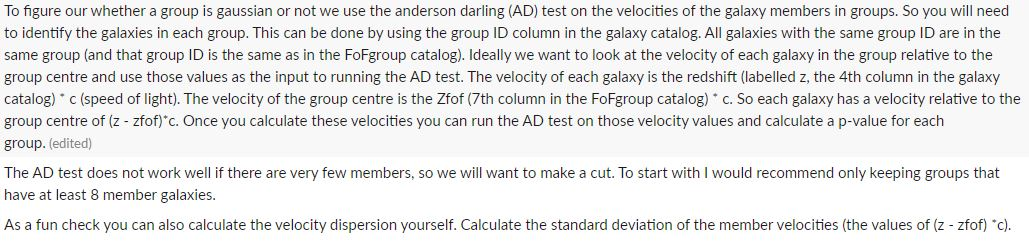